In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [521]:
df = pd.read_csv('train.csv')

In [522]:
df.head(60)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [523]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [524]:
print(df['store'].unique())
print(df['item'].unique())

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [525]:
df.drop(columns=['item','store'],axis=1,inplace=True)

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


Converting date feature from object to date-time datatype

In [527]:
df['date'] = pd.to_datetime(df['date'])

Date of form ->> YYYY-MM-DD

In [528]:
df.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


Converting date to a month period, and then sum the number of items in each month

In [529]:
df['date'] = df['date'].dt.to_period("M")
# this will sum all the sales that have same value of dates as we have updated the df with monthly view
monthly_sales = df.groupby('date').sum().reset_index()

In [530]:
df.head()

,date,sales
0,2013-01,13
1,2013-01,11
2,2013-01,14
3,2013-01,13
4,2013-01,10


converting resulting date column to timestamp datatype

In [531]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

In [532]:
monthly_sales.head(10)

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


Visualization

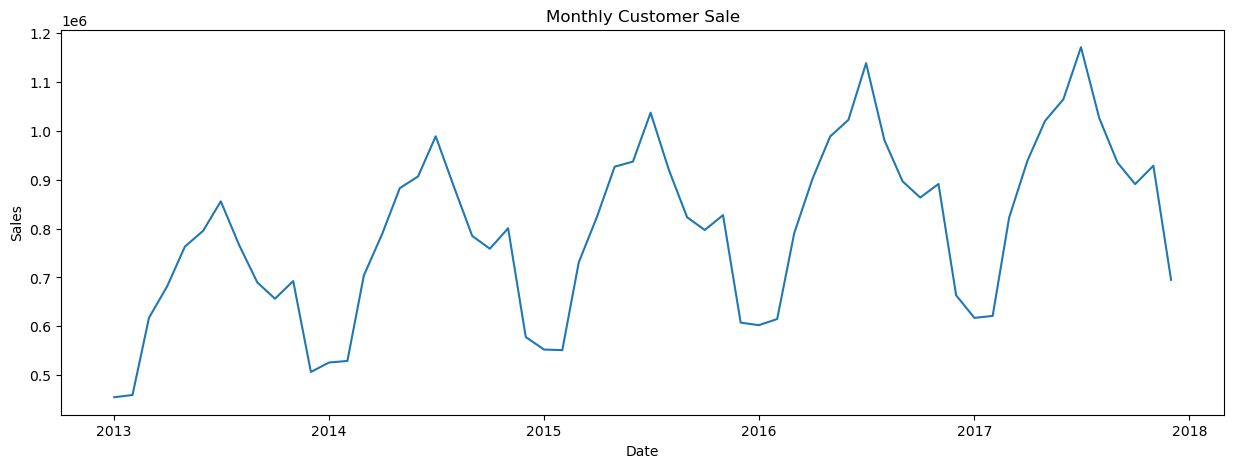

In [533]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Customer Sale')
plt.show()

call the difference on the sales columns to make the sales data stationary

In [534]:
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()
monthly_sales.head(30)

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


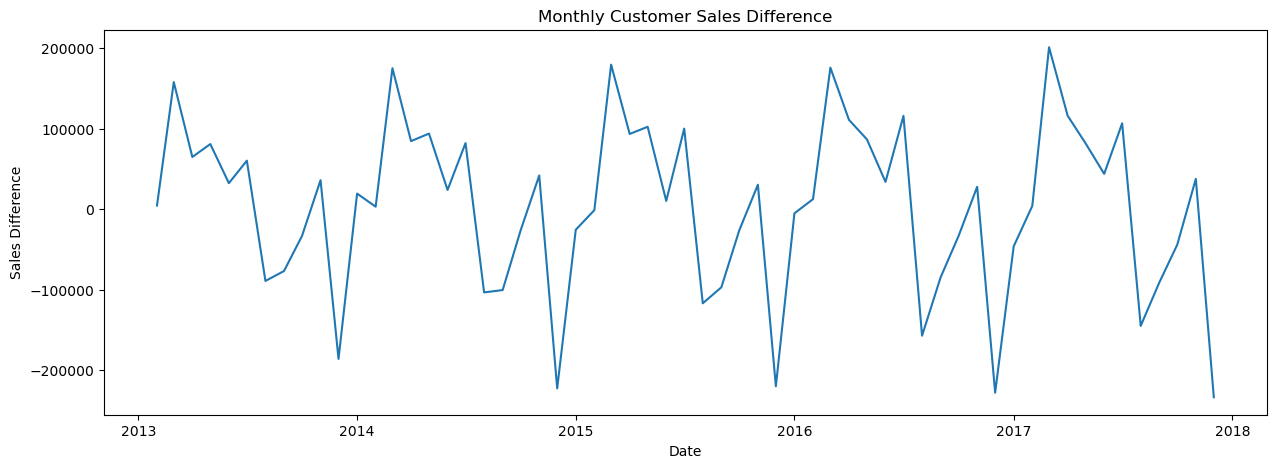

In [535]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales_diff'])
plt.xlabel('Date')
plt.ylabel('Sales Difference')
plt.title('Monthly Customer Sales Difference')
plt.show()

Dropping Sales and Date

In [536]:
supervised_data = monthly_sales.drop(columns = ['date','sales'])

preparing supervised data

In [537]:
# for 12 months
for i in range(1,13):
    col_name = 'month_' + str(i)
    supervised_data[col_name] = supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)
supervised_data.head()

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0


In [538]:
supervised_data.shape

(47, 13)

In [539]:
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]
print(train_data.shape)
print(test_data.shape)

(35, 13)
(12, 13)


In [540]:
test_data

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
35,-46105.0,-228037.0,27811.0,-33194.0,-84663.0,-157224.0,116054.0,33934.0,86780.0,111069.0,175924.0,12518.0,-5133.0
36,4063.0,-46105.0,-228037.0,27811.0,-33194.0,-84663.0,-157224.0,116054.0,33934.0,86780.0,111069.0,175924.0,12518.0
37,201298.0,4063.0,-46105.0,-228037.0,27811.0,-33194.0,-84663.0,-157224.0,116054.0,33934.0,86780.0,111069.0,175924.0
38,116195.0,201298.0,4063.0,-46105.0,-228037.0,27811.0,-33194.0,-84663.0,-157224.0,116054.0,33934.0,86780.0,111069.0
39,81824.0,116195.0,201298.0,4063.0,-46105.0,-228037.0,27811.0,-33194.0,-84663.0,-157224.0,116054.0,33934.0,86780.0
40,43938.0,81824.0,116195.0,201298.0,4063.0,-46105.0,-228037.0,27811.0,-33194.0,-84663.0,-157224.0,116054.0,33934.0
41,106769.0,43938.0,81824.0,116195.0,201298.0,4063.0,-46105.0,-228037.0,27811.0,-33194.0,-84663.0,-157224.0,116054.0
42,-144990.0,106769.0,43938.0,81824.0,116195.0,201298.0,4063.0,-46105.0,-228037.0,27811.0,-33194.0,-84663.0,-157224.0
43,-91140.0,-144990.0,106769.0,43938.0,81824.0,116195.0,201298.0,4063.0,-46105.0,-228037.0,27811.0,-33194.0,-84663.0
44,-44103.0,-91140.0,-144990.0,106769.0,43938.0,81824.0,116195.0,201298.0,4063.0,-46105.0,-228037.0,27811.0,-33194.0


In [541]:
scaler = MinMaxScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [542]:
#  sales_diff will be our target and all 12 months_shift
X_train , y_train = train_data[:,1:], train_data[:,0:1]
X_test , y_test = test_data[:,1:], test_data[:,0:1]

In [543]:
y_train = y_train.ravel()
y_test = y_test.ravel()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35, 12)
(35,)
(12, 12)
(12,)


Make prediction data frame to merge the predicted sales prices of all trained algorithmns 

In [544]:
# Prediction over year 2017
sales_dates = monthly_sales['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [545]:
# Keeping actual sales known so that we can compare it with the predicted sales
act_sales = monthly_sales['sales'][-13:].to_list()
print(act_sales)

[663411, 617306, 621369, 822667, 938862, 1020686, 1064624, 1171393, 1026403, 935263, 891160, 928837, 695170]


Linear Regression Model

In [546]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

lr_pre = lr_model.predict(X_test)

In [547]:
lr_pre = lr_pre.reshape(-1,1)
# This is a set matrix- contains the input features of test data and predicted output
lr_pre_test_set = np.concatenate([lr_pre,X_test], axis = 1) #  Combining Predictions with Test Features
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)

In [548]:
lr_pre_test_set

array([[ -15496.21493431, -228037.        ,   27811.        ,
         -33194.        ,  -84663.        , -157224.        ,
         116054.        ,   33934.        ,   86780.        ,
         111069.        ,  175924.        ,   12518.        ,
          -5133.        ],
       [  11031.37815765,  -46105.        , -228037.        ,
          27811.        ,  -33194.        ,  -84663.        ,
        -157224.        ,  116054.        ,   33934.        ,
          86780.        ,  111069.        ,  175924.        ,
          12518.        ],
       [ 198150.00014217,    4063.        ,  -46105.        ,
        -228037.        ,   27811.        ,  -33194.        ,
         -84663.        , -157224.        ,  116054.        ,
          33934.        ,   86780.        ,  111069.        ,
         175924.        ],
       [ 120972.12302654,  201298.        ,    4063.        ,
         -46105.        , -228037.        ,   27811.        ,
         -33194.        ,  -84663.        , -157224

In [549]:
result_list = []
for index in range(0,len(lr_pre_test_set)):
    result_list.append(lr_pre_test_set[index][0] + act_sales[index])

lr_pre_series = pd.Series(result_list, name='Linear Prediction')
predict_df = predict_df.merge(lr_pre_series, left_index=True, right_index= True) 

In [550]:
monthly_sales

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


In [551]:
# Check above in monthly sales for year 2017 , predicted and actual values are nearly equal 
# (monthly_sales['sales'] is nearly equal with predicted_df['Linear prediction'])
predict_df 

,date,Linear Prediction
0,2017-01-01,6.479148e+05
1,2017-02-01,6.283374e+05
2,2017-03-01,8.195190e+05
3,2017-04-01,9.436391e+05
4,2017-05-01,1.033653e+06
5,2017-06-01,1.065286e+06
6,2017-07-01,1.201561e+06
7,2017-08-01,1.002123e+06
8,2017-09-01,9.415142e+05
9,2017-10-01,9.080646e+05


In [552]:
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'],monthly_sales['sales'][-12:])) # monthly_sales for year 2017 only
lr_mae = mean_absolute_error(predict_df['Linear Prediction'],monthly_sales['sales'][-12:])
lr_r2 = r2_score(predict_df['Linear Prediction'],monthly_sales['sales'][-12:])

print('Linear Regression MSE: ',lr_mse)
print('Linear Regression MAE: ',lr_mae)
print('Linear Regression R2_SCORE: ',lr_r2)

Linear Regression MSE:  16221.27238541685
Linear Regression MAE:  12433.184266490774
Linear Regression R2_SCORE:  0.9906152516380969


Visualization of the prediction against actual sales

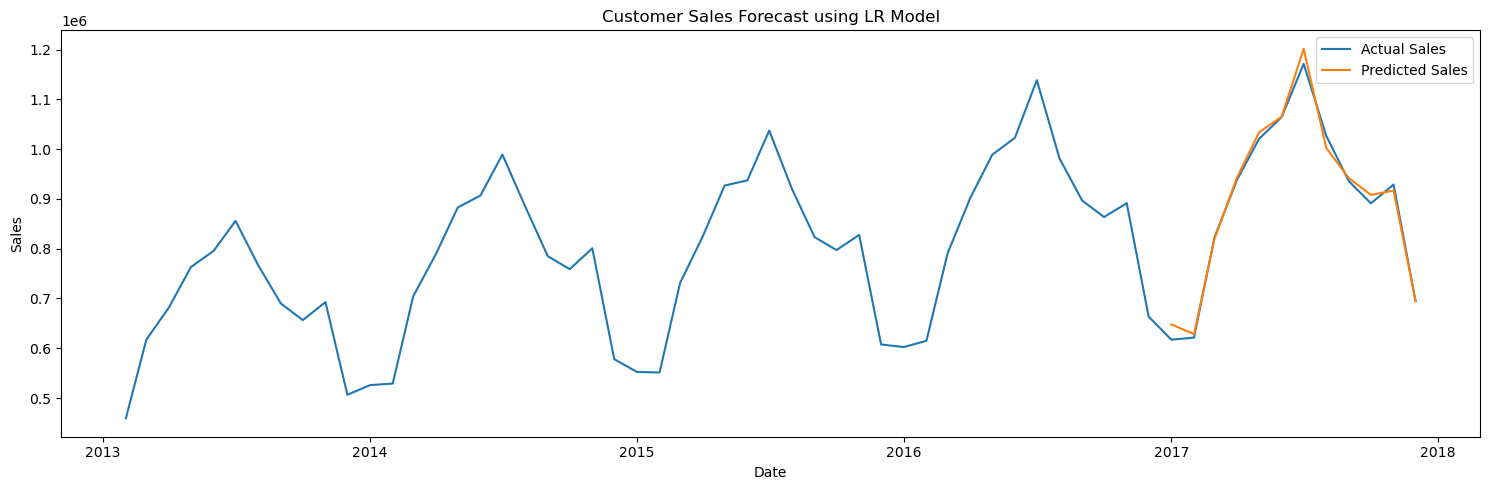

In [553]:
plt.figure(figsize=(15,5))
# Actual Sales
plt.plot(monthly_sales['date'],monthly_sales['sales'])
# Predicted Sales
plt.plot(predict_df['date'],predict_df['Linear Prediction'])
plt.title('Customer Sales Forecast using LR Model')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(['Actual Sales', 'Predicted Sales'])
plt.tight_layout()
plt.show()

In [554]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(lr_model,f)